# 01. МАШИННОЕ ОБУЧЕНИЕ

# Какую задачу решает машинное обучение?

Задано множество объектов $X$, множество допустимых ответов $Y$, и существует целевая функция $y^∗: X \rightarrow Y$, значения которой $y_i = y^∗(x_i)$ известны только на конечном подмножестве объектов $\{ x_1, ..., x_l\} \in X$.

Совокупность пар $X_l = \{(x_i, y_i) |  i \in \{1, ..., l\} \}$ называется обучающей выборкой.

Задача обучения с учителем состоит в том, чтобы по выборке $X_l$ восстановить зависимость $y^∗$, то есть построить решающую функцию $y: X \rightarrow Y$, которая приближала бы целевую функцию $y^∗(x)$, причём не только на объектах обучающей выборки, но и на всём множестве $X$.

![](./res/01_learning_scheme.jpg)

# Как происходит обучение?

Функция потерь (loss function) --- это неотрицательная функция $L(y, x)$, характеризующая величину ошибки функции $y$ на объекте $x$. Если $L(y, x) = 0$, то ответ $y$ называется корректным.

Если мы подбираем решающую функцию $y$ среди некоторого семейства функций $A$, то удобно, чтобы функции из $A$ были параметризованы: $A = \{f(a) | a \in D\}$. Тогда поиск решающей функции, это поиск такого $a \in A$, что $L(f(a), x)$ принимает минимальные значения для всех $а$ из $D$.

### Пример с линейной регрессией

Двупараметрическое семейство функций (прямые $y = kx + b$):

![](./res/01_linear_regression.jpg)

### Градиентный спуск

Ландшафт функции потерь:

![](https://easyai.tech/wp-content/uploads/2019/01/tiduxiajiang-1.png)

Таким образом, мы имеем задачу оптимизации. Соответственно, применяем методы теории оптимизации.
Например, градиентный спуск.

$$\frac{df}{dx} = \lim_{h \rightarrow 0} \frac{f(x+h) -f (x)}{h}$$


![](./res/01_gradient_descent.jpg)

# Как мы поймём, что обучение прошло хорошо?

1. Значение функции потерь.
2. Тестирование на отложенной выборке.

![](./res/01_learning.jpg)

# В чём проблема с градиентным спуском?

##  Цепное правило

Градиентный спуск работает так:
1. у нас есть функция потерь $L$, которую мы хотим минимизировать
2. при этом у нас есть параметры модели, которые можем менять
3. если взять параметр $w$, то $\frac{dL}{dw}$ содержит информацию о том, к какому изменению $L$ приведёт небольшое изменение параметра $w$.

Предположим, что $y = g(x)$ и $z = f (g(x)) = f (y)$.
Тогда $$\frac{dz}{dx} = \frac{dz}{dy} \frac{dy}{dx}.$$

## Рост числа вычислений

Возьмём чуть более сложную ситуацию: $x = f(w)$, $y = f(x)$, $z = f(y)$.
Тогда
$$\frac{dz}{dw} = \frac{dz}{dy} \frac{dy}{dx} \frac{dx}{dw} =$$
$$= f'(y) f'(x) f'(w) =$$
$$= f'(f(f(w))) f'(f(w)) f'(w).$$

Выражение $f(w)$ возникает более одного раза. Варианты:
1. вычислить, сохранить и использовать
2. вычислять каждый раз

# Как эту проблему можно решить?

Алгоритм обратного распространения.

![](./res/01_learning_process.jpg)

# Как устроена работа с градиентами?

https://github.com/karpathy/micrograd

In [1]:
# pip install micrograd
# pip install graphviz
from micrograd.engine import Value
from graphviz import Digraph

In [2]:
def trace(root):
    nodes, edges = set(), set()
    def build(v):
        if v not in nodes:
            nodes.add(v)
            for child in v._prev:
                edges.add((child, v))
                build(child)
    build(root)
    return nodes, edges

def draw_dot(root, format='svg', rankdir='LR'):
    """
    format: png | svg | ...
    rankdir: TB (top to bottom graph) | LR (left to right)
    """
    assert rankdir in ['LR', 'TB']
    nodes, edges = trace(root)
    dot = Digraph(format=format, graph_attr={'rankdir': rankdir}) #, node_attr={'rankdir': 'TB'})
    
    for n in nodes:
        dot.node(name=str(id(n)), label = "{data %.2f | grad %.2f}" % (n.data, n.grad), shape='record')
        if n._op:
            dot.node(name=str(id(n)) + n._op, label=n._op)
            dot.edge(str(id(n)) + n._op, str(id(n)))
    
    for n1, n2 in edges:
        dot.edge(str(id(n1)), str(id(n2)) + n2._op)
    
    return dot

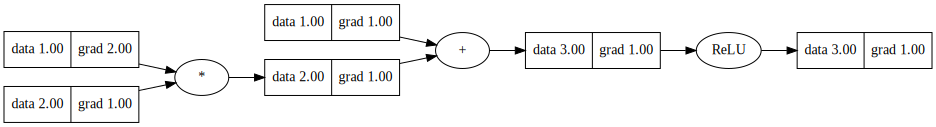

In [3]:
x = Value(1.0); x.label = 'x'
y = (x * 2 + 1).relu()
y.backward()
draw_dot(y)

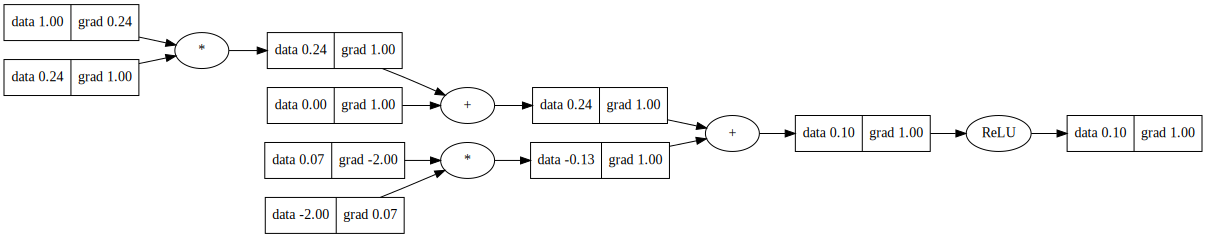

In [4]:
# a simple 2D neuron
import random
from micrograd import nn

random.seed(1337)
n = nn.Neuron(2)
x = [Value(1.0), Value(-2.0)]
y = n(x)
y.backward()

dot = draw_dot(y)
dot

https://github.com/karpathy/micrograd/blob/master/micrograd/engine.py

![](./res/01_micrograd_value.png)

### PyTorch

![](./res/01_computation_graph_pytorch.jpg)

# Нейронная сеть с точки зрения биологии

### Нейрон

![](./res/01_neuron.jpg)

### Нейронная сеть

![human cortex](https://www.oreilly.com/library/view/neural-networks-and/9781492037354/assets/mlst_1002.png)

# Нейронная сеть с точки зрения математики

### Модель

![](./res/01_neuron_model.jpg)

### Формулы

![](./res/01_neuron_math.jpg)
![](./res/01_neural_network_math.jpg)

## Универсальность нейронных сетей

### Нелинейность

![](./res/01_nonlinearity.jpg)

### Теорема Цыбенко

![](./res/01_cybenko_1.png)
![](./res/01_cybenko_2.png)

# Нейронная сеть с точки зрения программирования

### AlexNet

![](./res/01_alexnet.png)

### Код

![](./res/01_alexnet_code.png)

https://github.com/karpathy/micrograd/blob/master/micrograd/nn.py

# Упражнение

Реализовать одну из операций:
1. $e^x$ --- экспонента
2. $\tanh(x)$ --- гиперболический тангенс

как метод класса [Value](https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L2). Для тестирования надо построить небольшой вычислительный граф, запустить обратное распространение и отрисовать ([пример](https://github.com/karpathy/micrograd/blob/master/trace_graph.ipynb)).

Пример для операции сложения: https://github.com/karpathy/micrograd/blob/c911406e5ace8742e5841a7e0df113ecb5d54685/micrograd/engine.py#L13.
Дополнительные [пояснения](https://www.youtube.com/watch?v=VMj-3S1tku0).

## Полезные ссылки и источники для изображений

1. [Goodfellow et al - Deep learning](https://www.deeplearningbook.org/)
2. [Stevens et al - Deep Learning with PyTorch: Build, train, and tune neural networks using Python tools](https://www.manning.com/books/deep-learning-with-pytorch)
3. [Karpathy - The spelled-out intro to neural networks and backpropagation: building micrograd](https://www.youtube.com/watch?v=VMj-3S1tku0)
4. [Zhang et al - Dive into Deep Learning](https://d2l.ai/)